In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[]


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import os

In [6]:
import cv2
import imghdr

In [7]:
data_dir="data"

In [8]:
img_ext=["jprg","jpg","bmp","png"]

In [21]:
for img_cl in os.listdir(data_dir):
    for imgi in os.listdir(os.path.join(data_dir,img_cl)):
        img_path=os.path.join(data_dir,img_cl,imgi)
        try: 
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e: 
            print('Issue with image {}'.format(img_path))


05-12-21-happy-people.jpg
data\happy\05-12-21-happy-people.jpg
0x0.jpg
data\sad\0x0.jpg


In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')
data

Found 305 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

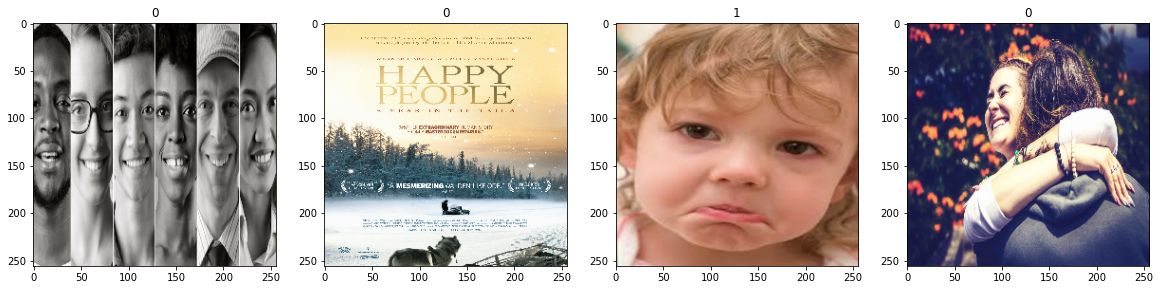

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x,y: (x/255, y))
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
len(data.as_numpy_iterator().next())

2

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential([
Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
MaxPooling2D(),
Conv2D(32, (3,3), 1, activation='relu'),
MaxPooling2D(),
Conv2D(16, (3,3), 1, activation='relu'),
MaxPooling2D(),
Flatten(),
Dense(256, activation='relu'),
Dense(1, activation='sigmoid')
    
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [36]:
model.compile('adam',
              loss="BinaryCrossentropy", metrics=['accuracy'])

In [37]:
model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
7/7 [==============================] - 9s 952ms/step - loss: 548.2489 - accuracy: 0.5268 - val_loss: 14.8590 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 7s 899ms/step - loss: 5.4959 - accuracy: 0.4821 - val_loss: 2.1773 - val_accuracy: 0.4219
Epoch 3/20
7/7 [==============================] - 8s 924ms/step - loss: 1.0003 - accuracy: 0.5714 - val_loss: 0.7453 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 8s 916ms/step - loss: 0.6280 - accuracy: 0.6205 - val_loss: 0.4087 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 8s 913ms/step - loss: 0.4440 - accuracy: 0.8438 - val_loss: 0.3812 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.4016 - accuracy: 0.8482 - val_loss: 0.2915 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 8s 951ms/step - loss: 0.2610 - accuracy: 0.9152 - val_loss: 0.1434 - val_accuracy: 0.9844
Epoch 8/20
7/7 [====

In [60]:
test_img=cv2.imread("ImageClassification-main/154006829.jpg")

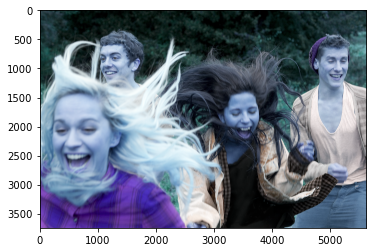

In [61]:
plt.imshow(test_img)
plt.show()

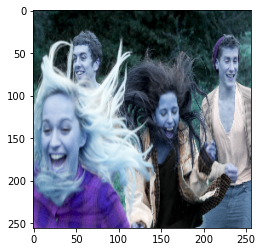

In [62]:
resize = tf.image.resize(test_img, (256,256))
plt.imshow(resize.numpy().astype(int))


In [63]:
pred=model.predict(np.expand_dims(resize/255,0))
pred

1/1 [==============================] - 0s 31ms/step


array([[0.5064364]], dtype=float32)

In [64]:
if pred[0]>0.50:
    print("SAD")
else:
    print("Happy")

SAD
